In [110]:
# Importing the required library again after the execution state was reset
import random
import math
import numpy as np

# Defining the TSP class
class TSP:
    def __init__(self, seed=None):
        """
        Initialize the TSP class.
        
        Parameters:
            seed (int, optional): Random seed for reproducibility. Default is None.
        """
        if seed is not None:
            random.seed(seed)
        self.cities = {}
        
    def generate_cities(self, num_cities, x_limit=50, y_limit=50):
        """
        Generate a dictionary of city coordinates.
        
        Parameters:
            num_cities (int): The number of cities.
            x_limit (int): The maximum x-coordinate value.
            y_limit (int): The maximum y-coordinate value.
        """
       # TODO: Generate a dictionary of city coordinates
        pass



In [111]:
# Instantiate the TSP class and generate city coordinates for 5 cities
tsp_instance = TSP(seed=42)  # Using seed for reproducibility
tsp_instance.generate_cities(5)
print(tsp_instance.cities)

{1: (40, 7), 2: (1, 47), 3: (17, 15), 4: (14, 8), 5: (47, 6)}


=== Scatter Plot of Dictionary Data ===
1: (40, 7)
2: (1, 47)
3: (17, 15)
4: (14, 8)
5: (47, 6)


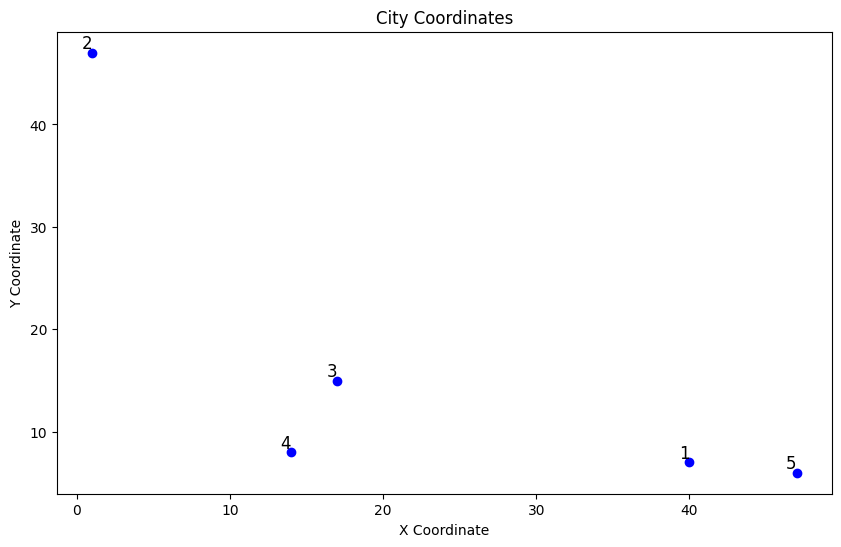

In [112]:


# Importing additional libraries for data visualization
import matplotlib.pyplot as plt

class DataVisualizer :

    @classmethod
    def simple_display_dict(cls, data_dict, title="Dictionary Data"): # dictionary, title
        """
        Display a dictionary in a simple text format.
        
        Parameters:
            data_dict (dict): The dictionary to be displayed.
            title (str): The title to be shown before displaying the dictionary.
        """
        print(f"=== {title} ===")
        for key, value in data_dict.items():
            print(f"{key}: {value}")

    @classmethod
    def display_dict_as_scatter(cls, data_dict, title="Title", x_label="X", y_label="Y"): # dictionary, title, x_label, y_label
        """
        Display a dictionary as a scatter plot using Matplotlib.
        
        Parameters:
            data_dict (dict): The dictionary containing data points. Expected to be in the form {key: (x, y)}.
            title (str): The title of the scatter plot.
            x_label (str): The label for the x-axis.
            y_label (str): The label for the y-axis.
        """
        # Extract x and y coordinates from the dictionary
        title = title
        x_coords = [coord[0] for coord in data_dict.values()]
        y_coords = [coord[1] for coord in data_dict.values()]
        
        # Create the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(x_coords, y_coords, marker='o', c='blue')
        
        # Annotate each point with its key
        for key, (x, y) in data_dict.items():
            plt.text(x, y, str(key), fontsize=12, ha='right', va='bottom')
        
        # Add titles and labels
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        # Show the plot
        plt.show()
    



# Test the method with the previously generated city coordinates
DataVisualizer.simple_display_dict(tsp_instance.cities, title="Scatter Plot of Dictionary Data")


# Test the method with the previously generated city coordinates
DataVisualizer.display_dict_as_scatter(tsp_instance.cities, title="City Coordinates",  x_label="X Coordinate", y_label="Y Coordinate")




In [113]:
# Renaming the DataVisualizer class to DV for simplicity
class DV(DataVisualizer):
    pass

# Test the renamed class with the previously generated city coordinates
DV.simple_display_dict(tsp_instance.cities, title="Scatter Plot of Dictionary Data")


=== Scatter Plot of Dictionary Data ===
1: (40, 7)
2: (1, 47)
3: (17, 15)
4: (14, 8)
5: (47, 6)


##  The computation of TSP with different cities.


In [114]:
# Importing the math library for mathematical operations
import math

# Extending the TSP class to include methods for calculating distances
class TSP:
    def __init__(self, seed=None):
        if seed is not None:
            random.seed(seed)
        self.cities = {}
        
    def generate_cities(self, num_cities, x_limit=100, y_limit=100):
        for i in range(1, num_cities + 1):
            x = random.randint(0, x_limit)
            y = random.randint(0, y_limit)
            self.cities[i] = (x, y)
            
    def Euclidean_distance(self, city1, city2):
        '''Calculate the Euclidean distance between two cities.'''
        # TODO: Calculate the Euclidean distance between two cities
        pass

    def great_circle_distance(self, lat1, lon1, lat2, lon2):
        '''Calculate the great circle distance between two points on a sphere.'''
        PI = 3.141592
        RRR = 6378.388

        deg = int(lat1)
        minute = lat1 - deg
        latitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon1)
        minute = lon1 - deg
        longitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lat2)
        minute = lat2 - deg
        latitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon2)
        minute = lon2 - deg
        longitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        q1 = math.cos(longitude1 - longitude2)
        q2 = math.cos(latitude1 - latitude2)
        q3 = math.cos(latitude1 + latitude2)

        dij = int(RRR * math.acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0)
        return dij

# Instantiate the TSP class and generate city coordinates for 3 cities for testing
tsp_instance = TSP(seed=42)
tsp_instance.generate_cities(3)

# Test the Euclidean distance method
distance_euclidean = tsp_instance.Euclidean_distance(tsp_instance.cities[1], tsp_instance.cities[2])

# Test the great circle distance method
# For the purpose of the test, we treat city coordinates as latitude and longitude
distance_great_circle = tsp_instance.great_circle_distance(*tsp_instance.cities[1], *tsp_instance.cities[2])

print(f"Euclidean distance: {distance_euclidean}")
print(f"Great circle distance: {distance_great_circle}")



Euclidean distance: 111.73182178770737
Great circle distance: 9516


In [115]:
# Extending the TSP class to include a choice of distance calculation method
class TSP:
    def __init__(self, distance_method='E', seed=None):
        """
        Initialize the TSP class with an optional choice of distance calculation method.
        
        Parameters:
            distance_method (str): 'E' for Euclidean distance and 'G' for great circle distance. Default is 'E'.
            seed (int, optional): Random seed for reproducibility. Default is None.
        """
        if seed is not None:
            random.seed(seed)
        self.cities = {}
        self.distance_method = distance_method
        
    def generate_cities(self, num_cities, x_limit=100, y_limit=100):
        for i in range(1, num_cities + 1):
            x = random.randint(0, x_limit)
            y = random.randint(0, y_limit)
            self.cities[i] = (x, y)
            
    def calculate_distance(self, city1, city2):
        '''Calculate the distance between two cities based on the chosen method.'''
        if self.distance_method == 'E':
            # TODO: Calculate the Euclidean distance between two cities
            return "???"
        elif self.distance_method == 'G':
            # TODO: Calculate the great circle distance between two cities
            return "???"
        else:
            raise ValueError("Invalid distance method. Use 'E' for Euclidean or 'G' for great circle distance.")
    
    def Euclidean_distance(self, city1, city2):
        x1, y1 = city1
        x2, y2 = city2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    def great_circle_distance(self, lat1, lon1, lat2, lon2):
        PI = 3.141592
        RRR = 6378.388

        deg = int(lat1)
        minute = lat1 - deg
        latitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon1)
        minute = lon1 - deg
        longitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lat2)
        minute = lat2 - deg
        latitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon2)
        minute = lon2 - deg
        longitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        q1 = math.cos(longitude1 - longitude2)
        q2 = math.cos(latitude1 - latitude2)
        q3 = math.cos(latitude1 + latitude2)

        dij = int(RRR * math.acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0)
        return dij
    

    


In [116]:


# Instantiate the TSP class with 'E' for Euclidean distance and generate city coordinates for 3 cities
tsp_instance_E = TSP(distance_method='E', seed=42)
tsp_instance_E.generate_cities(5)
distance_E = tsp_instance_E.calculate_distance(tsp_instance_E.cities[1], tsp_instance_E.cities[2])

# Instantiate the TSP class with 'G' for great circle distance and generate city coordinates for 3 cities
tsp_instance_G = TSP(distance_method='G', seed=42)
tsp_instance_G.generate_cities(5)
distance_G = tsp_instance_G.calculate_distance(tsp_instance_G.cities[1], tsp_instance_G.cities[2])

print(f"cites: {tsp_instance_E.cities}")
print(f"cites coordinates: {DV.simple_display_dict(tsp_instance_E.cities)}")

print(f"Euclidean distance(between city 1 and city 2): {distance_E}")
print(f"Great circle distance(between city 1 and city 2): {distance_G}")




cites: {1: (81, 14), 2: (3, 94), 3: (35, 31), 4: (28, 17), 5: (94, 13)}
=== Dictionary Data ===
1: (81, 14)
2: (3, 94)
3: (35, 31)
4: (28, 17)
5: (94, 13)
cites coordinates: None
Euclidean distance(between city 1 and city 2): 111.73182178770737
Great circle distance(between city 1 and city 2): 9516


Create a distance matrix for all cities



In [117]:

def matrix(self):
    """Create a distance matrix for all cities."""
    num_cities = len(self.cities)
    self.distance_matrix = np.zeros((num_cities, num_cities))
    
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = self.calculate_distance(self.cities[i+1], self.cities[j+1])
            self.distance_matrix[i, j] = dist
            self.distance_matrix[j, i] = dist  # Symmetric matrix

# Dynamically replace 'future_method1' with the renamed 'matrix' method in the existing TSP class
setattr(TSP, 'matrix', matrix)
# delattr(TSP, 'future_method1')  # Delete the future_method1 if it exists

# Test the newly added and renamed method
tsp_instance = TSP(distance_method='E', seed=42)
tsp_instance.generate_cities(9)
tsp_instance.matrix()
tsp_instance.distance_matrix



array([[  0.        , 111.73182179,  49.04079934,  53.08483776,
         13.03840481,  80.15609771,  12.36931688,  40.44749683,
         77.78174593],
       [111.73182179,   0.        ,  70.66116331,  80.95677859,
        121.82774725,  83.        , 106.04244433,  82.36504113,
         91.00549434],
       [ 49.04079934,  70.66116331,   0.        ,  15.65247584,
         61.68468205,  81.05553652,  39.44616585,  46.14108798,
         41.77319715],
       [ 53.08483776,  80.95677859,  15.65247584,   0.        ,
         66.12110102,  96.40020747,  41.43669871,  59.81638571,
         27.78488798],
       [ 13.03840481, 121.82774725,  61.68468205,  66.12110102,
          0.        ,  81.39410298,  25.07987241,  45.18849411,
         90.55385138],
       [ 80.15609771,  83.        ,  81.05553652,  96.40020747,
         81.39410298,   0.        ,  84.72307832,  41.48493703,
        122.49489785],
       [ 12.36931688, 106.04244433,  39.44616585,  41.43669871,
         25.07987241,  84.7230

This method is just to make the matrix look more tidy, it has nothing to do with the core code and can be ignored.
    



In [118]:

@classmethod
def format_matrix(cls, matrix):
    
    cell_widths = []
    for row in matrix:
        cell_widths.append(max(len(str(x)) for x in row))   

    formatted_rows = []
    for row, cell_width in zip(matrix, cell_widths):
        formatted_row = []
        for cell, width in zip(row, cell_widths):
            formatted_row.append(str(cell).rjust(width))
        formatted_rows.append(" ".join(formatted_row))
    return "\n".join(formatted_rows)

# Dynamically add the 'format_matrix' method to the existing DV class
setattr(DV, 'format_matrix', format_matrix)

# Test the newly added method with a sample matrix
sample_matrix = [[0, 111.73, 49.04], [111.73, 0, 70.66], [49.04, 70.66, 0]]
formatted_matrix = DV.format_matrix(sample_matrix)
print("Formatted Matrix:\n", formatted_matrix)

print("Formatted Matrix:\n", DV.format_matrix(tsp_instance.distance_matrix))



Formatted Matrix:
      0 111.73 49.04
111.73      0 70.66
 49.04  70.66     0
Formatted Matrix:
                0.0 111.73182178770737 49.040799340956916  53.08483775994799 13.038404810405298 80.15609770940699  12.36931687685298 40.44749683231337  77.78174593052023
111.73182178770737                0.0  70.66116330771806  80.95677859203639 121.82774724995944              83.0 106.04244433244644   82.365041127896  91.00549433962765
49.040799340956916  70.66116330771806                0.0 15.652475842498529  61.68468205316454 81.05553651663777  39.44616584663204 46.14108798023731 41.773197148410844
 53.08483775994799  80.95677859203639 15.652475842498529                0.0  66.12110101926616 96.40020746865642  41.43669871020132 59.81638571495272 27.784887978899608
13.038404810405298 121.82774724995944  61.68468205316454  66.12110101926616                0.0 81.39410298049853 25.079872407968907 45.18849411078001  90.55385138137417
 80.15609770940699               83.0  81.05553651663777 

In [119]:
# Adding a new method to convert the distance matrix to a 2D dictionary in the TSP class

def matrix_to_dict(self):
    """Converts the distance matrix to a 2D dictionary."""
    matrix_dict = {}
    for i, row in enumerate(self.distance_matrix):
        matrix_dict[i+1] = {}  # Initialize each row as an empty dictionary
        for j, value in enumerate(row):
            matrix_dict[i+1][j+1] = value  # Add the value to the corresponding city pair
    return matrix_dict

# Dynamically add the 'matrix_to_dict' method to the existing TSP class
setattr(TSP, 'matrix_to_dict', matrix_to_dict)

# Test the newly added method with the existing distance matrix
tsp_instance = TSP(distance_method='E', seed=42)
tsp_instance.generate_cities(3)
tsp_instance.matrix()
matrix_dict = tsp_instance.matrix_to_dict()
matrix_dict


{1: {1: 0.0, 2: 111.73182178770737, 3: 49.040799340956916},
 2: {1: 111.73182178770737, 2: 0.0, 3: 70.66116330771806},
 3: {1: 49.040799340956916, 2: 70.66116330771806, 3: 0.0}}

### Organized into new categories
Contains class parameters for the purpose of unifying the TSP interface


In [120]:
class TSP :
    # Class Variables
    distance_method = 'E'
    seed = 42
    num_cities = None
    cities = None
    distance_matrix_list = None
    distance_matrix_dict = None
    
    def __init__(self, num_cities=3, cities_coordinates=None, distance_matrix_list = None,distance_method='E', seed=42):
        """
        Initialize the TSP class with flexible parameters.
        
        Parameters:
            num_cities (int, optional): The number of cities to generate if cities_coordinates is not provided.
            cities_coordinates (dict or list of tuple, optional): Predefined cities coordinates.
            distance_method (str): 'E' for Euclidean distance and 'G' for great circle distance. Default is 'E'.
            seed (int, optional): Random seed for reproducibility. Default is 42.
        """
        self.distance_method = distance_method
        self.seed = seed if seed is not None else self.__class__.seed
        random.seed(self.seed)
        
        if cities_coordinates:
            if isinstance(cities_coordinates, dict):
                self.cities = cities_coordinates
            elif isinstance(cities_coordinates, list):
                self.cities = {i+1: coord for i, coord in enumerate(cities_coordinates)}
            else:
                raise ValueError("Invalid type for cities_coordinates. It should be either dict or list of tuple.")
        else:
            self.num_cities = num_cities if num_cities else self.__class__.num_cities
            self.generate_cities(self.num_cities)
        
        # Initialize the distance matrices
        self.distance_matrix_list = distance_matrix_list if distance_matrix_list else self.__class__.distance_matrix_list
        self.distance_matrix_dict = None

    def generate_cities(self, num_cities, x_limit=100, y_limit=100):
        """
        Generate random city coordinates.
        
        Parameters:
            num_cities (int): The number of cities to generate.
            x_limit (int, optional): The maximum x-coordinate. Default is 100.
            y_limit (int, optional): The maximum y-coordinate. Default is 100.
        """
        self.cities = {}
        for i in range(1, num_cities + 1):
            x = random.randint(0, x_limit)
            y = random.randint(0, y_limit)
            self.cities[i] = (x, y)
    
    
    def calculate_distance(self, city1, city2):
        '''Calculate the distance between two cities based on the chosen method.'''
        if self.distance_method == 'E':
            return self.Euclidean_distance(city1, city2)
        elif self.distance_method == 'G':
            return self.great_circle_distance(*city1, *city2)
        else:
            raise ValueError("Invalid distance method. Use 'E' for Euclidean or 'G' for great circle distance.")
    
    def Euclidean_distance(self, city1, city2):
        x1, y1 = city1
        x2, y2 = city2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    def great_circle_distance(self, lat1, lon1, lat2, lon2):
        PI = 3.141592
        RRR = 6378.388

        deg = int(lat1)
        minute = lat1 - deg
        latitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon1)
        minute = lon1 - deg
        longitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lat2)
        minute = lat2 - deg
        latitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon2)
        minute = lon2 - deg
        longitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        q1 = math.cos(longitude1 - longitude2)
        q2 = math.cos(latitude1 - latitude2)
        q3 = math.cos(latitude1 + latitude2)

        dij = int(RRR * math.acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0)
        return dij
    
    def matrix(self):
        """Create a distance matrix for all cities."""
        num_cities = len(self.cities)
        self.distance_matrix_list = np.zeros((num_cities, num_cities))

        for i in range(num_cities):
            for j in range(i+1, num_cities):
                dist = self.calculate_distance(self.cities[i+1], self.cities[j+1])
                self.distance_matrix_list[i, j] = dist
                self.distance_matrix_list[j, i] = dist  # Symmetric matrix
        self.distance_matrix_dict = self.matrix_to_dict()
    
    def matrix_to_dict(self):
        """Converts the distance matrix to a 2D dictionary."""
        matrix_dict = {}
        for i, row in enumerate(self.distance_matrix_list):
            matrix_dict[i+1] = {}  
            for j, value in enumerate(row):
                matrix_dict[i+1][j+1] = value  
        return matrix_dict
   
    def generate_initial_solution(self):
        """Generate an initial solution by simply following the city numbers."""
        self.initial_solution = list(self.cities.keys())
        return self.initial_solution

### Test new class

In [121]:
# Test with 3 cities and seed=42
# tsp_test = TSP (num_cities=3, seed=42)
tsp_test = TSP ()
tsp_test.matrix()  # Call to populate the distance matrix
print("Test with 3 cities and seed=42")
print("Cities: ", tsp_test.cities)
print("Distance Matrix (List): \n", tsp_test.distance_matrix_list)
print("Distance Matrix (Dict): \n", tsp_test.distance_matrix_dict)

# Test with predefined cities_coordinates as dict
tsp_test2 = TSP (cities_coordinates={1: (0, 0), 2: (1, 1), 3: (2, 2)})
tsp_test2.matrix()  # Call to populate the distance matrix
print("\nTest with predefined cities_coordinates as dict")
print("Cities: ", tsp_test2.cities)
print("Distance Matrix (List): \n", tsp_test2.distance_matrix_list)
print("Distance Matrix (Dict): \n", tsp_test2.distance_matrix_dict)

# Testing the refactored TSP class when initialized with a list of city coordinates
cities_coordinates_list = [(0, 0), (1, 1), (2, 2)]
tsp_test3 = TSP (cities_coordinates=cities_coordinates_list)
tsp_test3.matrix()  # Call to populate the distance matrix

# Displaying the results
print("Test: Initialize with predefined cities_coordinates as list")
print("Cities: ", tsp_test3.cities)
print("Distance Matrix (List): \n", tsp_test3.distance_matrix_list)
print("Distance Matrix (Dict): \n", tsp_test3.distance_matrix_dict)

# Testing the generate_initial_solution method with the previously tested initializations

# 1. Initialize with 3 cities and seed=42
tsp_test = TSP (num_cities=3, seed=42)
initial_solution1 = tsp_test.generate_initial_solution()

# 2. Initialize with predefined cities_coordinates as dict
cities_coordinates_dict = {1: (0, 0), 2: (1, 1), 3: (2, 2)}
tsp_test2 = TSP (cities_coordinates=cities_coordinates_dict)
initial_solution2 = tsp_test2.generate_initial_solution()

# 3. Initialize with predefined cities_coordinates as list
cities_coordinates_list = [(0, 0), (1, 1), (2, 2)]
tsp_test3 = TSP (cities_coordinates=cities_coordinates_list)
initial_solution3 = tsp_test3.generate_initial_solution()

# Displaying the initial solutions for the different initializations
print("Initial solution for 3 cities and seed=42: ", initial_solution1)
print("Initial solution for predefined cities_coordinates as dict: ", initial_solution2)
print("Initial solution for predefined cities_coordinates as list: ", initial_solution3)


Test with 3 cities and seed=42
Cities:  {1: (81, 14), 2: (3, 94), 3: (35, 31)}
Distance Matrix (List): 
 [[  0.         111.73182179  49.04079934]
 [111.73182179   0.          70.66116331]
 [ 49.04079934  70.66116331   0.        ]]
Distance Matrix (Dict): 
 {1: {1: 0.0, 2: 111.73182178770737, 3: 49.040799340956916}, 2: {1: 111.73182178770737, 2: 0.0, 3: 70.66116330771806}, 3: {1: 49.040799340956916, 2: 70.66116330771806, 3: 0.0}}

Test with predefined cities_coordinates as dict
Cities:  {1: (0, 0), 2: (1, 1), 3: (2, 2)}
Distance Matrix (List): 
 [[0.         1.41421356 2.82842712]
 [1.41421356 0.         1.41421356]
 [2.82842712 1.41421356 0.        ]]
Distance Matrix (Dict): 
 {1: {1: 0.0, 2: 1.4142135623730951, 3: 2.8284271247461903}, 2: {1: 1.4142135623730951, 2: 0.0, 3: 1.4142135623730951}, 3: {1: 2.8284271247461903, 2: 1.4142135623730951, 3: 0.0}}
Test: Initialize with predefined cities_coordinates as list
Cities:  {1: (0, 0), 2: (1, 1), 3: (2, 2)}
Distance Matrix (List): 
 [[0.  

In [122]:

import math
import random
import numpy as np
import timeit

class TSP :
    def __init__(self, num_cities=3, cities_coordinates=None, distance_method='E', seed=42):
        self.distance_method = distance_method
        self.seed = seed
        random.seed(self.seed)
        if cities_coordinates:
            if isinstance(cities_coordinates, dict):
                self.cities = cities_coordinates
                self.num_cities = len(self.cities)
            elif isinstance(cities_coordinates, list):
                self.cities = {i+1: coord for i, coord in enumerate(cities_coordinates)}
                self.num_cities = len(self.cities)
        else:
            self.num_cities = num_cities
            self.generate_cities(self.num_cities)
        self.distance_matrix_list = None
        self.distance_matrix_dict = None

    def generate_cities(self, num_cities, x_limit=100, y_limit=100):
        self.cities = {}
        for i in range(1, num_cities + 1):
            x = random.randint(0, x_limit)
            y = random.randint(0, y_limit)
            self.cities[i] = (x, y)

    def calculate_distance(self, city1, city2):
        if self.distance_method == 'E':
            return self.Euclidean_distance(city1, city2)
        elif self.distance_method == 'G':
            return self.great_circle_distance(*city1, *city2)

    def Euclidean_distance(self, city1, city2):
        x1, y1 = city1
        x2, y2 = city2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    def great_circle_distance(self, lat1, lon1, lat2, lon2):
        PI = 3.141592
        RRR = 6378.388

        deg = int(lat1)
        minute = lat1 - deg
        latitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon1)
        minute = lon1 - deg
        longitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lat2)
        minute = lat2 - deg
        latitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon2)
        minute = lon2 - deg
        longitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        q1 = math.cos(longitude1 - longitude2)
        q2 = math.cos(latitude1 - latitude2)
        q3 = math.cos(latitude1 + latitude2)

        dij = int(RRR * math.acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0)
        return dij

    def matrix(self):
        num_cities = len(self.cities)
        self.distance_matrix_list = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            for j in range(i+1, num_cities):
                dist = self.calculate_distance(self.cities[i+1], self.cities[j+1])
                self.distance_matrix_list[i, j] = dist
                self.distance_matrix_list[j, i] = dist
        self.distance_matrix_dict = self.matrix_to_dict()

    def matrix_to_dict(self):
        matrix_dict = {}
        for i, row in enumerate(self.distance_matrix_list):
            matrix_dict[i+1] = {}
            for j, value in enumerate(row):
                matrix_dict[i+1][j+1] = value
        return matrix_dict

    def generate_initial_solution(self):
        self.initial_solution = list(self.cities.keys())
        return self.initial_solution

    # Method 1: Directly calculate the total distance for the entire path
    def total_distance_direct(self, path):
        total_distance = 0
        for i in range(len(path) - 1):
            total_distance += self.calculate_distance(self.cities[path[i]], self.cities[path[i+1]])
        total_distance += self.calculate_distance(self.cities[path[-1]], self.cities[path[0]])
        return total_distance

    # Method 2: Use the matrix to find the total distance
    def total_distance_matrix(self, path):
        total_distance = 0
        for i in range(len(path) - 1):
            total_distance += self.distance_matrix_dict[path[i]][path[i+1]]
        total_distance += self.distance_matrix_dict[path[-1]][path[0]]
        return total_distance

    # Method 3: Use delta evaluation to find the total distance
    def total_distance_delta(self, current_total_distance, path, swap_indices):
        i, j = swap_indices
        if i == 0:
            pre_i, post_j = path[-1], path[j+1]
        elif j == len(path) - 1:
            pre_i, post_j = path[i-1], path[0]
        else:
            pre_i, post_j = path[i-1], path[j+1]
        
        delta = (self.distance_matrix_dict[pre_i][path[j]] + self.distance_matrix_dict[path[i]][post_j]) - \
                (self.distance_matrix_dict[pre_i][path[i]] + self.distance_matrix_dict[path[j]][post_j])
        return current_total_distance + delta

# Initialize an instance of the TSP  class
tsp_test = TSP (num_cities=10, seed=42)
tsp_test.matrix()
initial_solution = tsp_test.generate_initial_solution()



In [123]:
import random
import math
import numpy as np
# Creating a new class SA (Simulated Annealing Algorithm), There will be a more detailed version at the bottom

class SA:
    def __init__(self, tsp, cooling_schedule='linear', initial_temperature=1000, alpha=0.995, iterations=1000):
        self.tsp = tsp
        self.cooling_schedule = cooling_schedule
        self.initial_temperature = initial_temperature
        self.alpha = alpha
        self.iterations = iterations
        self.current_solution = tsp.generate_initial_solution()
        self.current_distance = tsp.total_distance_matrix(self.current_solution)
        self.best_solution = None
        self.best_distance = float('inf')
        
    def acceptance_probability(self, delta, temperature):
        return math.exp(-delta / temperature)
    
    def anneal(self):
        temperature = self.initial_temperature
        for iteration in range(self.iterations):
            
            # TODO: Create a candidate solution by copying the current solution and performing a random swap
            candidate_solution = self.current_solution.copy()
            i, j = '???', '???'
            candidate_solution[i], candidate_solution[j] = candidate_solution[j], candidate_solution[i]
            
            # Calculate the new total distance after the swap using the candidate solution
            new_distance = self.tsp.total_distance_matrix(candidate_solution)
            
            # Calculate the delta (change in total distance due to the swap)
            delta = new_distance - self.current_distance
            
            # Accept the new solution if it improves the objective function or if it is accepted based on the acceptance probability
            if delta < 0 or self.acceptance_probability(delta, temperature) > random.random():
                self.current_distance = new_distance
                self.current_solution = candidate_solution.copy()
                
                if self.current_distance < self.best_distance:
                    self.best_distance = self.current_distance
                    self.best_solution = self.current_solution.copy()
                    
            # Apply the cooling schedule
            if self.cooling_schedule == 'linear':
                temperature -= self.alpha
            elif self.cooling_schedule == 'geometric':
                temperature *= self.alpha
            elif self.cooling_schedule == 'logarithmic':
                temperature = self.initial_temperature / math.log(iteration + 2)
                
            # Early stopping criterion: stop if temperature falls below a certain threshold
            if temperature < 1e-6:
                break
        
        return self.best_solution, self.best_distance

# Test the new SA class
tsp_test_SA = TSP (num_cities=5, seed=42)
tsp_test_SA.matrix()  # Populate the distance matrix
SA_test = SA(tsp_test_SA, cooling_schedule='linear', iterations=1000)
best_solution_SA, best_distance_SA = SA_test.anneal()
best_solution_SA, best_distance_SA


([4, 1, 5, 2, 3], 274.26462897052926)


Test city coordinates

In [ ]:
cities_data = [
    (16.47, 96.10),
    (16.47, 94.44),
    (20.09, 92.54),
    (22.39, 93.37),
    (25.23, 97.24),
    (22.00, 96.05),
    (20.47, 97.02),
    (17.20, 96.29),
    (16.30, 97.38),
    (14.05, 98.12),
    (16.53, 97.38),
    (21.52, 95.59),
    (19.41, 97.13),
    (20.09, 94.55)
]

tsp_test = TSP (cities_coordinates=cities_data, distance_method='G')
tsp_test.matrix()
print("Cities: ", tsp_test.cities)
# print("Distance Matrix (List): \n", tsp_test.distance_matrix_list)
print("Distance Matrix (List): \n", DV.format_matrix(tsp_test.distance_matrix_list))


saa = SA(tsp_test, cooling_schedule='linear', iterations=1000)
best_solution, best_distance = saa.anneal()
best_solution, best_distance


In [125]:
tsp_test = TSP (cities_coordinates=cities_data, distance_method='G', seed=4256)
tsp_test.matrix()
print("Cities: ", tsp_test.cities)
saa = SA(tsp_test, cooling_schedule='linear', iterations=1000)
best_solution, best_distance = saa.anneal()
print("Best solution: ", best_solution)
print("Best distance: ", best_distance)



Cities:  {1: (16.47, 96.1), 2: (16.47, 94.44), 3: (20.09, 92.54), 4: (22.39, 93.37), 5: (25.23, 97.24), 6: (22.0, 96.05), 7: (20.47, 97.02), 8: (17.2, 96.29), 9: (16.3, 97.38), 10: (14.05, 98.12), 11: (16.53, 97.38), 12: (21.52, 95.59), 13: (19.41, 97.13), 14: (20.09, 94.55)}
Best solution:  [13, 7, 12, 6, 5, 4, 3, 14, 2, 10, 11, 9, 1, 8]
Best distance:  3416.0


In [126]:
# for i in range(1,10):
#     tsp_test = TSP (cities_coordinates=cities_data, distance_method='G', seed=i)
#     tsp_test.matrix()
#     saa = SA(tsp_test, cooling_schedule='linear', iterations=10000)
#     best_solution, best_distance = saa.anneal()
#     print("test",i," Best solution: ", best_solution)
#     print("Best distance: ", best_distance)


tsp_test = TSP (cities_coordinates=cities_data, distance_method='G', seed=42)
tsp_test.matrix()
solution = [12, 7, 13, 8, 11, 9, 10, 1, 2, 3, 14, 6, 5, 4]
print("solution distance: ", tsp_test.total_distance_matrix(solution))





solution distance:  3559.0


LocalSearch with delta_eval method

\begin{array}{l}
\textbf{Function: Delta(i, j, path)} \\
\hline
1: \quad \textbf{Input:} \\
\quad \quad i: \text{integer, the index of the first city} \\
\quad \quad j: \text{integer, the index of the second city} \\
\quad \quad path: \text{list of integers, representing the current path} \\
2: \quad \textbf{Output:} \\
\quad \quad delta: \text{integer, the change in distance when swapping the cities at indices i and j} \\
3: \quad \textbf{Initialize:} \\
\quad \quad n: \text{integer, the number of cities (calculated as the length of the path)} \\
\quad \quad \text{prev\_i, next\_i, prev\_j, next\_j: integers, representing the indices of the neighboring cities of i and j respectively} \\
4: \quad \textbf{Procedure:} \\
5: \quad \quad \textbf{if} \ \text{abs}(i - j) \ \text{mod} \ n = 1 \ \text{or} \ \text{abs}(i - j) \ \text{mod} \ n = n - 1 \ \textbf{then} \\
6: \quad \quad \quad \text{return} \ 0  \text{  (the delta is zero as the cities are adjacent)} \\
7: \quad \quad \textbf{end if} \\
8: \quad \quad \text{Calculate the old distance as the sum of the distances between adjacent pairs of cities including i and j} \\
9: \quad \quad \text{Calculate the new distance as the sum of the distances between adjacent pairs of cities after swapping i and j} \\
10: \quad \quad \text{delta} \leftarrow \text{new\_distance - old\_distance} \\
11: \quad \textbf{Return:} \\
12: \quad \quad \textbf{return} \ \text{delta} \\
\end{array}


In [127]:
# Adding the delta_eval method to the LocalSearch class
class LocalSearch:
    def __init__(self, tsp_instance):
        self.tsp = tsp_instance

    def delta_eval(self, i, j, path):
        """
        Performs Delta Evaluation to calculate the change in distance 
        when two cities at index i and j in the given path are swapped.
        """
        n = len(path)
        prev_i, next_i = path[(i - 1) % n], path[(i + 1) % n]
        prev_j, next_j = path[(j - 1) % n], path[(j + 1) % n]
        
        if abs(i - j) % n == 1 or abs(i - j) % n == n - 1:
            return 0  # In this case, the delta is zero as the cities are adjacent
        
        old_distance = (self.tsp.distance_matrix_dict[prev_i][path[i]] + 
                        self.tsp.distance_matrix_dict[next_i][path[i]] + 
                        self.tsp.distance_matrix_dict[prev_j][path[j]] + 
                        self.tsp.distance_matrix_dict[next_j][path[j]])
        
        # TODO: Calculate the new distance after the swap
        new_distance = "???"
        
        delta = new_distance - old_distance
        return delta

    def optimize(self, initial_solution, distance_calculation_method='delta'):
        current_solution = initial_solution.copy()
        improved = True

        while improved:
            improved = False
            for i in range(len(current_solution)):
                for j in range(i+1, len(current_solution)):
                    delta = 0
                    if distance_calculation_method == 'delta':
                        delta = self.delta_eval(i, j, current_solution)
                    elif distance_calculation_method == 'direct':
                        # Calculate the total distance before and after the swap
                        old_distance = self.tsp.total_distance_direct(current_solution)
                        current_solution[i], current_solution[j] = current_solution[j], current_solution[i]
                        new_distance = self.tsp.total_distance_direct(current_solution)
                        delta = new_distance - old_distance
                        # Swap back
                        current_solution[i], current_solution[j] = current_solution[j], current_solution[i]
                    elif distance_calculation_method == 'matrix':
                        # Calculate the total distance before and after the swap using the matrix
                        old_distance = self.tsp.total_distance_matrix(current_solution)
                        current_solution[i], current_solution[j] = current_solution[j], current_solution[i]
                        new_distance = self.tsp.total_distance_matrix(current_solution)
                        delta = new_distance - old_distance
                        # Swap back
                        current_solution[i], current_solution[j] = current_solution[j], current_solution[i]
                    
                    if delta < 0:
                        # Swap the cities and update the current solution
                        current_solution[i], current_solution[j] = current_solution[j], current_solution[i]
                        improved = True
        return current_solution


In [128]:

# Testing the updated LocalSearch class with delta_eval and other methods
cities_data = [
    (16.47, 96.10),
    (16.47, 94.44),
    (20.09, 92.54),
    (22.39, 93.37),
    (25.23, 97.24),
    (22.00, 96.05),
    (20.47, 97.02),
    (17.20, 96.29),
    (16.30, 97.38),
    (14.05, 98.12),
    (16.53, 97.38),
    (21.52, 95.59),
    (19.41, 97.13),
    (20.09, 94.55)
]

tsp_instance_10 = TSP(cities_coordinates=cities_data, distance_method='G', seed=5)
tsp_instance_10.matrix()

# Initialize LocalSearch with the new TSP instance
ls = LocalSearch(tsp_instance_10)

# Generate an initial solution
initial_solution_10 = tsp_instance_10.generate_initial_solution()

# Perform optimization using different distance calculation methods
optimized_solution_delta_10 = ls.optimize(initial_solution_10, distance_calculation_method='delta')
optimized_solution_direct_10 = ls.optimize(initial_solution_10, distance_calculation_method='direct')
optimized_solution_matrix_10 = ls.optimize(initial_solution_10, distance_calculation_method='matrix')

# Calculate the total distance for each optimized solution
total_distance_delta_10 = tsp_instance_10.total_distance_direct(optimized_solution_delta_10)
total_distance_direct_10 = tsp_instance_10.total_distance_direct(optimized_solution_direct_10)
total_distance_matrix_10 = tsp_instance_10.total_distance_direct(optimized_solution_matrix_10)

optimized_solution_delta_10, total_distance_delta_10, optimized_solution_direct_10, total_distance_direct_10, optimized_solution_matrix_10, total_distance_matrix_10


([2, 14, 3, 4, 5, 6, 12, 7, 13, 1, 8, 11, 9, 10],
 3416,
 [14, 2, 3, 4, 5, 6, 12, 11, 9, 10, 1, 8, 13, 7],
 3969,
 [14, 2, 3, 4, 5, 6, 12, 11, 9, 10, 1, 8, 13, 7],
 3969)

In [130]:
import random
import timeit
 

# 5 
cities_5 = [(1,2), (3,4), (5,6), (7,8), (9,10)]
tsp_5 = TSP(cities_coordinates=cities_5)
tsp_5.matrix()
ls_5 = LocalSearch(tsp_5)  

initial_solution_5 = tsp_5.generate_initial_solution()
optimized_delta_5 = ls_5.optimize(initial_solution_5, 'delta')
optimized_direct_5 = ls_5.optimize(initial_solution_5, 'direct')
optimized_matrix_5 = ls_5.optimize(initial_solution_5, 'matrix')

print("5 cities:") 
print("Delta time:", timeit.timeit(lambda: tsp_5.total_distance_delta(0, optimized_delta_5, (1, 2)), number=1000))
print("Direct time:", timeit.timeit(lambda: tsp_5.total_distance_direct(optimized_direct_5), number=1000))
print("Matrix time:", timeit.timeit(lambda: tsp_5.total_distance_matrix(optimized_matrix_5), number=1000))

# 10
cities_10 = [(1,2), (3,4), (5,6), (7,8), (9,10), 
             (11,12), (13,14), (15,16), (17,18), (19,20)]
tsp_10 = TSP(cities_coordinates=cities_10)
tsp_10.matrix()
ls_10 = LocalSearch(tsp_10)

initial_solution_10 = tsp_10.generate_initial_solution()  
optimized_delta_10 = ls_10.optimize(initial_solution_10, 'delta')
optimized_direct_10 = ls_10.optimize(initial_solution_10, 'direct')
optimized_matrix_10 = ls_10.optimize(initial_solution_10, 'matrix')

print("10 cities:")
print("Delta time:", timeit.timeit(lambda: tsp_10.total_distance_delta(0, optimized_delta_10, (1, 2)), number=1000))
print("Direct time:", timeit.timeit(lambda: tsp_10.total_distance_direct(optimized_direct_10), number=1000)) 
print("Matrix time:", timeit.timeit(lambda: tsp_10.total_distance_matrix(optimized_matrix_10), number=1000))

# 15
cities_15 = [(1,2), (3,4), (5,6), (7,8), (9,10),  
             (11,12), (13,14), (15,16), (17,18), (19,20),
             (21,22), (23,24), (25,26), (27,28), (29, 30)] 
tsp_15 = TSP(cities_coordinates=cities_15)
tsp_15.matrix()
ls_15 = LocalSearch(tsp_15)

initial_solution_15 = tsp_15.generate_initial_solution()
optimized_delta_15 = ls_15.optimize(initial_solution_15, 'delta') 
optimized_direct_15 = ls_15.optimize(initial_solution_15, 'direct')
optimized_matrix_15 = ls_15.optimize(initial_solution_15, 'matrix')

print("15 cities:")
print("Delta time:", timeit.timeit(lambda: tsp_15.total_distance_delta(0, optimized_delta_15, (1, 2)), number=1000))  
print("Direct time:", timeit.timeit(lambda: tsp_15.total_distance_direct(optimized_direct_15), number=1000))
print("Matrix time:", timeit.timeit(lambda: tsp_15.total_distance_matrix(optimized_matrix_15), number=1000))

5 cities:
Delta time: 0.0008367000009457115
Direct time: 0.004201800002192613
Matrix time: 0.0017798999979277141
10 cities:
Delta time: 0.0008089000002655666
Direct time: 0.007904999998572748
Matrix time: 0.0017402000012225471
15 cities:
Delta time: 0.0008292999991681427
Direct time: 0.012473099999624537
Matrix time: 0.0024571000030846335


{'Seed': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'Delta_Time': [0.0005961000024399254,
  0.001061199996911455,
  0.0005713999998988584,
  0.0005861999998160172,
  0.0005745999987993855,
  0.000569200001336867,
  0.0005673000014212448,
  0.0005803999993077014,
  0.0005801999977848027,
  0.0005708999997295905,
  0.0005869999986316543,
  0.0005682000009983312,
  0.0005758000006608199,
  0.0005959999980404973,
  0.0008244999989983626,
  0.0006156000017654151,
  0.0005834000003233086,
  0.0005517999998119194,
  0.000567900002351962,
  0.0005822999992233235,
  0.0005359999995562248,
  0.000556999999389518,
  0.0005710000004910398,
  0.0006318000014289282,
  0.0005477000013343059,
  0.0006037000021024141,
  0.0005679999994754326,
  0.0005337000002327841,
  0.0005811000009998679,
  0.0005481000007421244],
 'Direct_Time': [0.012971899999683956,
  0.0110152999986894

In [133]:
import matplotlib.pyplot as plt

class DataVisualizer:

    @classmethod
    def simple_display_dict(cls, data_dict, title="Dictionary Data"):  # dictionary, title
        """
        Display a dictionary in a simple text format.
        
        Parameters:
            data_dict (dict): The dictionary to be displayed.
            title (str): The title to be shown before displaying the dictionary.
        """
        print(f"=== {title} ===")
        for key, value in data_dict.items():
            print(f"{key}: {value}")

    @classmethod
    def display_dict_as_scatter(cls, data_dict, title="Title", x_label="X", y_label="Y"):  # dictionary, title, x_label, y_label
        """
        Display a dictionary as a scatter plot using Matplotlib.
        
        Parameters:
            data_dict (dict): The dictionary containing data points. Expected to be in the form {key: (x, y)}.
            title (str): The title of the scatter plot.
            x_label (str): The label for the x-axis.
            y_label (str): The label for the y-axis.
        """
        # Extract x and y coordinates from the dictionary
        x_coords = [coord[0] for coord in data_dict.values()]
        y_coords = [coord[1] for coord in data_dict.values()]
        
        # Create the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(x_coords, y_coords, marker='o', c='blue')
        
        # Annotate each point with its key
        for key, (x, y) in data_dict.items():
            plt.text(x, y, str(key), fontsize=12, ha='right', va='bottom')
        
        # Add titles and labels
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        # Show the plot
        plt.show()

    @classmethod
    def display_time_efficiency_boxplot(cls, time_data, title="Time Efficiency Comparison", y_label="Time (s)"):
        """
        Display the time efficiency of different methods as a boxplot using Matplotlib.
        
        Parameters:
            time_data (dict): The dictionary containing time efficiency data. Expected to be in the form {'Method': [time1, time2, ...]}.
            title (str): The title of the boxplot.
            y_label (str): The label for the y-axis.
        """
        # Extract method names and corresponding time data
        methods = list(time_data.keys())
        time_values = [time_data[method] for method in methods]
        
        # Create the boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(time_values, labels=methods, showfliers=False)
        
        # Add titles and labels
        plt.title(title)
        plt.ylabel(y_label)
        
        # Show the plot
        plt.show()



Time data:  {'Seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Delta_Time': [0.9419000016350765, 0.5756999998993706, 0.5810000002384186, 0.5893000015930738, 0.5482000015035737, 0.7814999989932403, 0.5801000006613322, 0.5691000005754177, 0.7863999999244697, 0.952599999436643, 0.5755999991379213, 0.7098999994923361, 0.5720999979530461, 0.5706999982066918, 0.5812000017613173, 0.5901000004087109, 0.5748000003222842, 0.5772000004071742, 0.5852000031154603, 0.5897000010008924, 0.6151999987196177, 0.5772000004071742, 0.5853000002389308, 0.5850000015925616, 0.5802000014227815, 0.625900000159163, 0.589299997955095, 0.5786000001535285, 0.5751999997301027, 0.587200000154553, 0.5810000002384186, 0.5844000006618444, 0.5811000009998679, 0.5848000000696629, 0.5799999998998828, 0.6264000003284309, 0.5930999977863394, 0.5693999992217869, 0.5300000011629891,

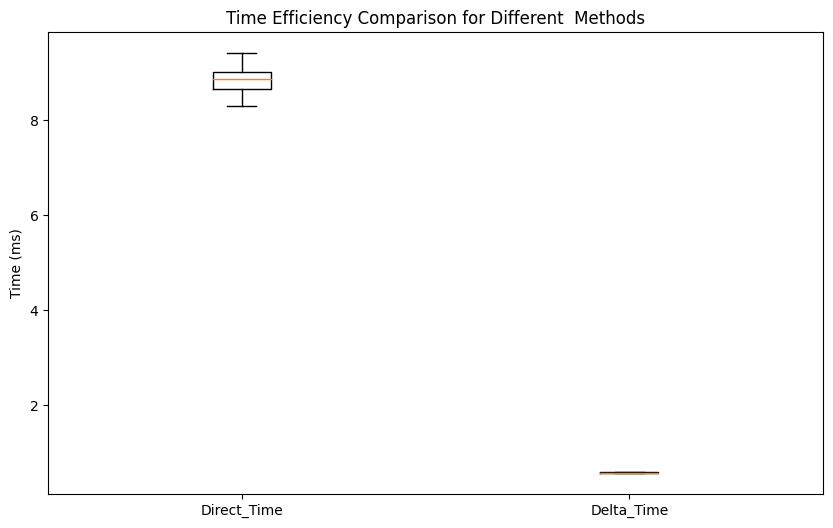

In [137]:
import timeit

# Function to time the optimization process for each method
def time_optimization(seed, cities_data, method):
    tsp_instance = TSP(cities_coordinates=cities_data, distance_method='G', seed=seed)
    tsp_instance.matrix()
    ls = LocalSearch(tsp_instance)
    initial_solution = tsp_instance.generate_initial_solution()
    
    start_time = timeit.default_timer()
    _ = ls.optimize(initial_solution, distance_calculation_method=method)
    end_time = timeit.default_timer()
    
    return (end_time - start_time ) * 1000  # Convert to milliseconds

# Initialize variables
seeds = list(range(1, 50))
time_data = {'Seed': [], 'Delta_Time': [], 'Direct_Time': [], 'Matrix_Time': []}

# Perform the timing tests
for seed in seeds:
    time_data['Seed'].append(seed)
    time_data['Delta_Time'].append(time_optimization(seed, cities_data, 'delta'))
    time_data['Direct_Time'].append(time_optimization(seed, cities_data, 'direct'))
    time_data['Matrix_Time'].append(time_optimization(seed, cities_data, 'matrix'))


print("Time data: ", time_data)


# Prepare the time data for boxplot visualization
boxplot_time_data = {
                     'Direct_Time': time_data['Direct_Time'], 
                    #  'Matrix_Time': time_data['Matrix_Time'],
                     'Delta_Time': time_data['Delta_Time']
                     }

# Display the time efficiency comparison as a boxplot
DataVisualizer.display_time_efficiency_boxplot(boxplot_time_data, title="Time Efficiency Comparison for Different  Methods", y_label="Time (ms)")


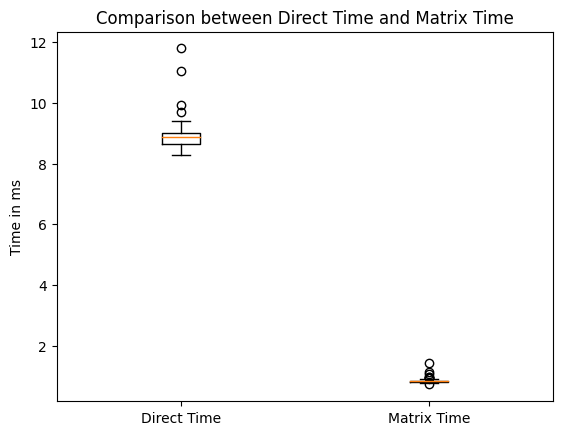

In [139]:
# Importing necessary libraries
import matplotlib.pyplot as plt


data = {
    'Seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
    'Delta_Time': [0.9419, 0.5757, 0.581, 0.5893, 0.5482, 0.7815, 0.5801, 0.5691, 0.7864, 0.9526, 0.5756, 0.7099, 0.5721, 0.5707, 0.5812, 0.5901, 0.5748, 0.5772, 0.5852, 0.5897, 0.6152, 0.5772, 0.5853, 0.585, 0.5802, 0.6259, 0.5893, 0.5786, 0.5752, 0.5872, 0.581, 0.5844, 0.5811, 0.5848, 0.58, 0.6264, 0.5931, 0.5694, 0.53, 0.5746, 0.6691, 0.6303, 0.5714, 0.5431, 0.588, 0.5829, 0.5018, 0.5703, 0.5439],
    'Direct_Time': [9.4104, 8.9958, 8.7638, 8.5781, 8.4568, 8.4785, 8.9396, 11.0576, 11.7974, 8.9782, 8.5374, 8.3526, 8.8676, 8.7387, 8.6496, 8.7087, 8.6318, 8.6526, 9.1742, 8.8457, 8.6098, 8.9239, 8.9218, 8.732, 9.0162, 9.3085, 9.0264, 8.721, 8.8667, 9.9367, 8.9647, 8.757, 9.1251, 9.321, 9.0734, 8.7506, 8.8789, 8.9241, 8.4337, 8.9498, 9.6876, 9.129, 8.7242, 8.6766, 8.8533, 8.2999, 8.5998, 8.5358, 8.9967],
    'Matrix_Time': [0.8, 0.8156, 0.8269, 0.7825, 0.9513, 0.9323, 0.8196, 0.7971, 1.4238, 0.8435, 0.7993, 0.8095, 0.7949, 0.8498, 0.805, 0.8022, 0.8193, 0.8086, 0.8381, 0.8819, 0.8104, 0.8315, 0.8388, 0.7912, 0.8302, 0.9293, 0.9261, 0.8121, 0.8215, 0.7979, 0.8736, 0.8178, 1.0605, 0.8008, 0.8327, 0.8296, 0.8129, 1.1318, 0.7788, 0.8041, 0.8209, 0.8119, 0.7755, 0.8029, 0.9792, 0.7184, 0.8069, 0.7675, 0.8966]
}


fig, ax = plt.subplots()


ax.boxplot([data['Direct_Time'], data['Matrix_Time']])
ax.set_xticklabels(['Direct Time', 'Matrix Time'])

ax.set_title('Comparison between Direct Time and Matrix Time')
ax.set_ylabel('Time in ms')



# Display the plot
plt.show()


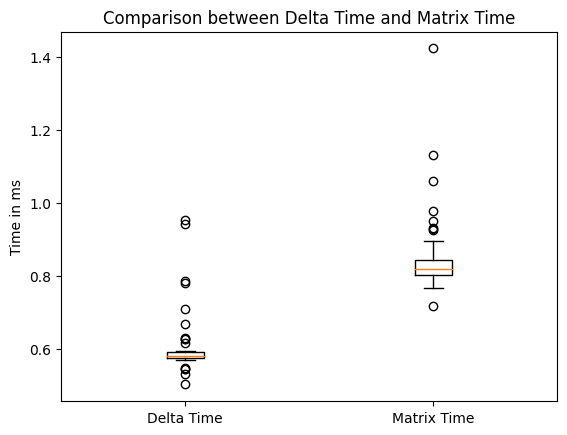

In [140]:
fig, ax = plt.subplots()
ax.boxplot([data['Delta_Time'], data['Matrix_Time']])
ax.set_xticklabels(['Delta Time', 'Matrix Time'])

ax.set_title('Comparison between Delta Time and Matrix Time')
ax.set_ylabel('Time in ms')

plt.show()


VNS

In [ ]:
# First, let's import the required libraries
import math
import random
import numpy as np
import timeit
import matplotlib.pyplot as plt

    
# Implementing the Variable Neighborhood Search (VNS) algorithm
class VNS:
    def __init__(self, tsp_instance, neighborhood_structures):
        self.tsp = tsp_instance
        self.neighborhood_structures = neighborhood_structures  # A list of neighborhood structures
    
    def shake(self, k, solution):
        """
        Perform the shaking step based on the k-th neighborhood structure.
        """
        return self.neighborhood_structures[k](solution)
    
    def local_search(self, initial_solution):
        """
        Perform a local search on the initial_solution using the first neighborhood structure.
        """
        # Using the first neighborhood structure for local search
        return self.neighborhood_structures[0](initial_solution)
    
    def optimize(self, initial_solution, max_iter=100):
        """
        Optimize the TSP problem using VNS.
        """
        current_solution = initial_solution[:]
        best_solution = initial_solution[:]
        best_distance = self.tsp.total_distance_direct(initial_solution)
        
        k_max = len(self.neighborhood_structures)
        
        for i in range(max_iter):
            k = 1
            while k <= k_max:
                # Shaking step
                new_starting_solution = self.shake(k - 1, current_solution)
                
                # Local Search
                new_solution = self.local_search(new_starting_solution)
                
                # Calculate the new distance
                new_distance = self.tsp.total_distance_direct(new_solution)
                
                # Update the current and best solutions
                if new_distance < best_distance:
                    best_solution = new_solution[:]
                    best_distance = new_distance
                    current_solution = new_solution[:]
                    k = 1  # Reset the neighborhood index
                else:
                    k += 1  # Move to the next neighborhood
                
        return best_solution, best_distance

# Defining some example neighborhood structures
def swap_two_cities(solution):
    """
    Swap two randomly chosen cities in the solution.
    """
    new_solution = solution[:]
    i, j = random.sample(range(len(new_solution)), 2)
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

def reverse_subsequence(solution):
    """
    Reverse a random subsequence in the solution.
    """
    new_solution = solution[:]
    i, j = sorted(random.sample(range(len(new_solution)), 2))
    new_solution[i:j+1] = reversed(new_solution[i:j+1])
    return new_solution


In [ ]:

# Example usage
neighborhoods = [swap_two_cities, reverse_subsequence]

# Initialize the TSP instance
cities_data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(10)]
tsp_instance = TSP(num_cities=10, cities_coordinates=cities_data)
tsp_instance.matrix()

# Initialize the VNS instance
vns = VNS(tsp_instance, neighborhoods)

# Generate an initial solution and optimize
initial_solution = tsp_instance.generate_initial_solution()
optimized_solution, optimized_distance = vns.optimize(initial_solution)

optimized_solution, optimized_distance

# test
cities_data = [
    (16.47, 96.10),
    (16.47, 94.44),
    (20.09, 92.54),
    (22.39, 93.37),
    (25.23, 97.24),
    (22.00, 96.05),
    (20.47, 97.02),
    (17.20, 96.29),
    (16.30, 97.38),
    (14.05, 98.12),
    (16.53, 97.38),
    (21.52, 95.59),
    (19.41, 97.13),
    (20.09, 94.55)
]

tsp_instance = TSP( cities_coordinates=cities_data, distance_method='G', seed=6)
tsp_instance.matrix()

# Initialize the VNS instance
vns = VNS(tsp_instance, neighborhoods)

# Generate an initial solution and optimize
initial_solution = tsp_instance.generate_initial_solution()
optimized_solution, optimized_distance = vns.optimize(initial_solution)

optimized_solution, optimized_distance




([13, 11, 8, 9, 10, 1, 2, 3, 14, 4, 5, 6, 12, 7], 3543)

dynamic programming dp

In [ ]:
class DP_TSP_Solver:
    def __init__(self, tsp_instance):
        self.tsp = tsp_instance
        self.min_cost = float('inf')
        self.best_path = []

    def solve(self):
        n = len(self.tsp.cities)
        dp = [[float('inf')] * n for _ in range(1 << n)]
        parent = [[None] * n for _ in range(1 << n)]
        
        dp[1][0] = 0  # starting from city 0
        
        # Iterate through all subsets of vertices
        for mask in range(1, 1 << n):
            for u in range(n):
                if not (mask & (1 << u)):
                    continue

                for v in range(n):
                    if mask & (1 << v) and self.tsp.distance_matrix_list[u][v]:
                        if dp[mask][u] > dp[mask ^ (1 << u)][v] + self.tsp.distance_matrix_list[u][v]:
                            dp[mask][u] = dp[mask ^ (1 << u)][v] + self.tsp.distance_matrix_list[u][v]
                            parent[mask][u] = v

        # Reconstruct the shortest path and compute the minimum cost
        mask = (1 << n) - 1  # All cities have been visited
        u = 0
        last_city = min(range(1, n), key=lambda v: dp[mask][v] + self.tsp.distance_matrix_list[v][0])
        self.min_cost = dp[mask][last_city] + self.tsp.distance_matrix_list[last_city][u]

        # Reconstruct the best path
        self.best_path = [0]  # start from city 0
        while True:
            self.best_path.append(last_city)
            u = last_city
            last_city = parent[mask][u]
            if last_city is None:  # break the loop when no more parent to trace
                break
            mask ^= (1 << u)

        return self.best_path[::-1], self.min_cost  # reverse the path to get the correct order

# Test the DP_TSP_Solver
solver = DP_TSP_Solver(tsp_test)
path, cost = solver.solve()
path, cost


([0, 9, 8, 10, 7, 12, 6, 11, 5, 4, 3, 2, 13, 1, 0], 3323.0)

TSP

In [ ]:
import math
import random
import numpy as np
import timeit

class TSP :
    def __init__(self, num_cities=14, cities_coordinates=None, distance_method='E', seed=42):
        self.distance_method = distance_method
        self.seed = seed
        self.num_cities = num_cities
        random.seed(self.seed)
        if cities_coordinates:
            if isinstance(cities_coordinates, dict):
                self.cities = cities_coordinates
                num_cities = len(self.cities)
            elif isinstance(cities_coordinates, list):
                self.cities = {i+1: coord for i, coord in enumerate(cities_coordinates)}
                num_cities = len(self.cities)
        else:
            self.num_cities = num_cities
            self.generate_cities(self.num_cities)
        self.distance_matrix_list = None
        self.distance_matrix_dict = None

    def generate_cities(self, num_cities, x_limit=100, y_limit=100):
        self.cities = {}
        for i in range(1, num_cities + 1):
            x = random.randint(0, x_limit)
            y = random.randint(0, y_limit)
            self.cities[i] = (x, y)

    def calculate_distance(self, city1, city2):
        if self.distance_method == 'E':
            return self.Euclidean_distance(city1, city2)
        elif self.distance_method == 'G':
            return self.great_circle_distance(*city1, *city2)

    def Euclidean_distance(self, city1, city2):
        x1, y1 = city1
        x2, y2 = city2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    def great_circle_distance(self, lat1, lon1, lat2, lon2):
        PI = 3.141592
        RRR = 6378.388

        deg = int(lat1)
        minute = lat1 - deg
        latitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon1)
        minute = lon1 - deg
        longitude1 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lat2)
        minute = lat2 - deg
        latitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        deg = int(lon2)
        minute = lon2 - deg
        longitude2 = PI * (deg + 5.0 * minute / 3.0) / 180.0

        q1 = math.cos(longitude1 - longitude2)
        q2 = math.cos(latitude1 - latitude2)
        q3 = math.cos(latitude1 + latitude2)

        dij = int(RRR * math.acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0)
        return dij

    def matrix(self):
        num_cities = len(self.cities)
        self.distance_matrix_list = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            for j in range(i+1, num_cities):
                dist = self.calculate_distance(self.cities[i+1], self.cities[j+1])
                self.distance_matrix_list[i, j] = dist
                self.distance_matrix_list[j, i] = dist
        self.distance_matrix_dict = self.matrix_to_dict()
        return self.distance_matrix_dict

    def matrix_to_dict(self):
        matrix_dict = {}
        for i, row in enumerate(self.distance_matrix_list):
            matrix_dict[i+1] = {}
            for j, value in enumerate(row):
                matrix_dict[i+1][j+1] = value
        return matrix_dict

    def generate_initial_solution(self):
        self.initial_solution = list(self.cities.keys())
        return self.initial_solution

    # Method 1: Directly calculate the total distance for the entire path
    def total_distance_direct(self, path):
        total_distance = 0
        for i in range(len(path) - 1):
            total_distance += self.calculate_distance(self.cities[path[i]], self.cities[path[i+1]])
        total_distance += self.calculate_distance(self.cities[path[-1]], self.cities[path[0]])
        return total_distance

    # Method 2: Use the matrix to find the total distance
    def total_distance_matrix(self, path):
        total_distance = 0
        for i in range(len(path) - 1):
            total_distance += self.distance_matrix_dict[path[i]][path[i+1]]
        total_distance += self.distance_matrix_dict[path[-1]][path[0]]
        return total_distance

cities_data = [
     (16.47, 96.10),
     (16.47, 94.44),
     (20.09, 92.54),
     (22.39, 93.37),
     (25.23, 97.24),
     (22.00, 96.05),
     (20.47, 97.02),
     (17.20, 96.29),
     (16.30, 97.38),
     (14.05, 98.12),
     (16.53, 97.38),
     (21.52, 95.59),
     (19.41, 97.13),
     (20.09, 94.55)
]

tsp_test = TSP (cities_coordinates=cities_data, distance_method='G')



climb mountains

In [ ]:
class HillClimbingTSP:
    def __init__(self, tsp_instance):
        self.tsp = tsp_instance
        self.n = len(tsp_instance.cities)
        self.distance_matrix = tsp_instance.distance_matrix_list

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by swapping two cities."""
        neighbors = []
        for i in range(self.n):
            for j in range(i+1, self.n):
                neighbor = solution.copy()
                neighbor[i], neighbor[j] = solution[j], solution[i]  # Swap two cities to create a neighbor
                neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate the total distance of a solution."""
        # TODO: Implement this method
        total_distance = '???'

        return total_distance

    def solve(self, max_iterations=100):
        """Implement the hill climbing algorithm starting with a random solution and moving to the best neighbor at each step."""
        current_solution = random.sample(range(self.n), self.n)  # Random initial solution
        current_value = self.evaluate(current_solution)

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            best_neighbor_value = min(neighbors_values)  # We want to minimize the total distance
            best_neighbor = neighbors[neighbors_values.index(best_neighbor_value)]

            if best_neighbor_value >= current_value:
                break  # If no improvement is found, stop the search

            current_solution = best_neighbor
            current_value = best_neighbor_value

        return current_solution, current_value

tsp_test = TSP (cities_coordinates=cities_data, distance_method='G')
tsp_test.matrix()  # Populate the distance matrix

# Test the HillClimbingTSP class
hill_climbing_solver = HillClimbingTSP(tsp_test)
path, cost = hill_climbing_solver.solve(max_iterations=100)
path, cost


([9, 0, 1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8], 3323.0)

In [ ]:
class SteepestAscentHillClimbingTSP:
    def __init__(self, tsp_instance):
        self.tsp = tsp_instance
        self.n = len(tsp_instance.cities)
        self.distance_matrix = tsp_instance.distance_matrix_list

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by swapping two cities."""
        neighbors = []
        for i in range(self.n):
            for j in range(i+1, self.n):
                neighbor = solution.copy()
                neighbor[i], neighbor[j] = solution[j], solution[i]  # Swap two cities to create a neighbor
                neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate the total distance of a solution."""
        total_distance = sum(self.distance_matrix[solution[i]][solution[i+1]] for i in range(self.n - 1))
        total_distance += self.distance_matrix[solution[-1]][solution[0]]  # Add the distance from the last city to the first city
        return total_distance

    def solve(self, max_iterations=100):
        """Implement the steepest ascent hill climbing algorithm starting with a random solution and moving to the best neighbor at each step."""
        current_solution = random.sample(range(self.n), self.n)  # Random initial solution
        current_value = self.evaluate(current_solution)

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            best_neighbor_value = min(neighbors_values)  # We want to minimize the total distance
            best_neighbor = neighbors[neighbors_values.index(best_neighbor_value)]

            # In this variation, we move to the best neighbor even if it doesn't improve the solution
            current_solution = best_neighbor
            current_value = best_neighbor_value

        return current_solution, current_value

# Test the SteepestAscentHillClimbingTSP class
steepest_ascent_hill_climbing_solver = SteepestAscentHillClimbingTSP(tsp_test)
path, cost = steepest_ascent_hill_climbing_solver.solve(max_iterations=100)
path, cost


([1, 2, 13, 11, 5, 3, 4, 6, 12, 10, 8, 9, 7, 0], 3530.0)


Hill climbing with random restarts

In [ ]:
class RandomRestartHillClimbingTSP:
    def __init__(self, tsp_instance):
        self.tsp = tsp_instance
        self.n = len(tsp_instance.cities)
        self.distance_matrix = tsp_instance.distance_matrix_list

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by swapping two cities."""
        neighbors = []
        for i in range(self.n):
            for j in range(i+1, self.n):
                neighbor = solution.copy()
                neighbor[i], neighbor[j] = solution[j], solution[i]  # Swap two cities to create a neighbor
                neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate the total distance of a solution."""
        total_distance = sum(self.distance_matrix[solution[i]][solution[i+1]] for i in range(self.n - 1))
        total_distance += self.distance_matrix[solution[-1]][solution[0]]  # Add the distance from the last city to the first city
        return total_distance

    def hill_climbing(self, initial_solution, max_iterations=100):
        """Implement the basic hill climbing algorithm starting with a given initial solution."""
        current_solution = initial_solution
        current_value = self.evaluate(current_solution)

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            best_neighbor_value = min(neighbors_values)  # We want to minimize the total distance
            best_neighbor = neighbors[neighbors_values.index(best_neighbor_value)]

            if best_neighbor_value >= current_value:
                break  # If no improvement is found, stop the search

            current_solution = best_neighbor
            current_value = best_neighbor_value

        return current_solution, current_value

    def solve(self, restarts=10, max_iterations=100):
        """Implement the random restart hill climbing algorithm with a specified number of restarts."""
        best_solution = None
        best_value = float('inf')  # Initialize to a high value because we want to minimize the distance

        for _ in range(restarts):
            initial_solution = random.sample(range(self.n), self.n)  # Random initial solution for each restart
            solution, value = '' # TODO Perform hill climbing on the initial solution
            
            if value < best_value:  
               # TODO If a better solution is found, update the best solution and value
               pass

        return best_solution, best_value

# Test the RandomRestartHillClimbingTSP class
random_restart_hill_climbing_solver = RandomRestartHillClimbingTSP(tsp_test)
path, cost = random_restart_hill_climbing_solver.solve(restarts=10, max_iterations=100)
path, cost


([1, 13, 2, 3, 4, 5, 11, 6, 12, 10, 8, 9, 7, 0], 3336.0)


Tabu search

In [ ]:
from collections import deque

class TabuSearchTSP:
    def __init__(self, tsp_instance, tabu_list_size=5):
        self.tsp = tsp_instance
        self.n = len(tsp_instance.cities)
        self.distance_matrix = tsp_instance.distance_matrix_list
        self.tabu_list_size = tabu_list_size
        self.tabu_list = deque(maxlen=tabu_list_size)  # A queue to store the recent moves

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by swapping two cities."""
        neighbors = []
        for i in range(self.n):
            for j in range(i+1, self.n):
                if ((i, j) not in self.tabu_list) and ((j, i) not in self.tabu_list):  # Check if the move is not tabu
                    neighbor = solution.copy()
                    neighbor[i], neighbor[j] = solution[j], solution[i]  # Swap two cities to create a neighbor
                    neighbors.append((neighbor, (i, j)))  # Store the move along with the neighbor
        return neighbors

    def evaluate(self, solution):
        """Evaluate the total distance of a solution."""
        total_distance = sum(self.distance_matrix[solution[i]][solution[i+1]] for i in range(self.n - 1))
        total_distance += self.distance_matrix[solution[-1]][solution[0]]  # Add the distance from the last city to the first city
        return total_distance

    def solve(self, max_iterations=100):
        """Implement the tabu search algorithm."""
        current_solution = random.sample(range(self.n), self.n)  # Random initial solution
        best_solution = current_solution.copy()
        current_value = self.evaluate(current_solution)
        best_value = current_value  # Initialize the best value to the value of the initial solution

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            if not neighbors:  # If there are no non-tabu neighbors, terminate the search
                break

            neighbors_values = [self.evaluate(neighbor[0]) for neighbor in neighbors]

            best_neighbor_value = min(neighbors_values)  # We want to minimize the total distance
            best_neighbor_index = neighbors_values.index(best_neighbor_value)
            best_neighbor, best_move = neighbors[best_neighbor_index]

            self.tabu_list.append(best_move)  # Add the move to the tabu list

            current_solution = best_neighbor
            current_value = best_neighbor_value

            if current_value < best_value:  # If a better solution is found, update the best solution and value
                best_solution = current_solution.copy()
                best_value = current_value

        return best_solution, best_value

# Test the TabuSearchTSP class
tabu_search_solver = TabuSearchTSP(tsp_test, tabu_list_size=5)
path, cost = tabu_search_solver.solve(max_iterations=100)
path, cost


([7, 10, 8, 9, 0, 1, 13, 2, 3, 4, 5, 11, 6, 12], 3323.0)

In [ ]:
class SimulatedAnnealingTSP:
    def __init__(self, tsp_instance, cooling_schedule='geometric', alpha=0.95, beta=0.01, initial_temperature=1000, final_temperature=1):
        self.tsp = tsp_instance
        self.n = len(tsp_instance.cities)
        self.distance_matrix = tsp_instance.distance_matrix_list
        self.cooling_schedule = cooling_schedule
        self.alpha = alpha
        self.beta = beta
        self.temperature = initial_temperature
        self.final_temperature = final_temperature
        self.initial_temperature = initial_temperature  # Added for logarithmic cooling

    def generate_neighbor(self, solution):
        """Generate a neighbor of the current solution by randomly swapping two cities."""
        i, j = random.sample(range(self.n), 2)  # Randomly select two distinct cities
        neighbor = solution.copy()
        neighbor[i], neighbor[j] = solution[j], solution[i]  # Swap two cities to create a neighbor
        return neighbor

    def evaluate(self, solution):
        """Evaluate the total distance of a solution."""
        total_distance = sum(self.distance_matrix[solution[i]][solution[i+1]] for i in range(self.n - 1))
        total_distance += self.distance_matrix[solution[-1]][solution[0]]  # Add the distance from the last city to the first city
        return total_distance

    def accept_solution(self, delta_e, temperature):
        """Determine whether to accept the new solution according to the Metropolis criterion."""
        # TODO: Implement this method
        if delta_e < 0:
            # If the new solution is better, accept it
            pass
        else:
            # If the new solution is worse, accept it with a probability that depends on the temperature
            pass

    def cool_down(self, temperature, iteration):
        """Cool down the temperature according to the selected cooling schedule."""
        if self.cooling_schedule == 'geometric':
            return self.alpha * temperature
        elif self.cooling_schedule == 'linear':
            return temperature - self.alpha
        elif self.cooling_schedule == 'lundy_and_mees':
            return temperature / (1 + self.beta * temperature)
        elif self.cooling_schedule == 'logarithmic':
            return self.initial_temperature / (1 + math.log1p(iteration))

    def solve(self, max_iterations=100):
        """Implement the simulated annealing algorithm."""
        current_solution = random.sample(range(self.n), self.n)  # Random initial solution
        best_solution = current_solution.copy()
        current_value = self.evaluate(current_solution)
        best_value = current_value  # Initialize the best value to the value of the initial solution
        iteration = 0

        while self.temperature > self.final_temperature and iteration < max_iterations:
            iteration += 1

            neighbor = self.generate_neighbor(current_solution)
            neighbor_value = self.evaluate(neighbor)

            delta_e = neighbor_value - current_value

            if self.accept_solution(delta_e, self.temperature):
                current_solution = neighbor
                current_value = neighbor_value

                if current_value < best_value:  # If a better solution is found, update the best solution and value
                    best_solution = current_solution.copy()
                    best_value = current_value

            self.temperature = self.cool_down(self.temperature, iteration)

        return best_solution, best_value

# Testing the updated SimulatedAnnealingTSP class with different cooling schedules
cooling_schedules = ['geometric', 'linear', 'lundy_and_mees', 'logarithmic']

results = []
for schedule in cooling_schedules:
    solver = SimulatedAnnealingTSP(tsp_test, cooling_schedule=schedule, alpha=0.95, beta=0.01, initial_temperature=1000, final_temperature=1)
    path, cost = solver.solve(max_iterations=1000)
    results.append((schedule, path, cost))

results


[('geometric', [12, 6, 13, 11, 5, 4, 3, 2, 1, 0, 10, 8, 9, 7], 3506.0),
 ('linear', [0, 7, 12, 6, 4, 5, 11, 3, 2, 13, 1, 9, 10, 8], 3535.0),
 ('lundy_and_mees', [10, 5, 11, 3, 4, 6, 12, 7, 8, 9, 1, 2, 13, 0], 4370.0),
 ('logarithmic', [12, 10, 8, 9, 0, 1, 7, 2, 13, 3, 11, 5, 4, 6], 3684.0)]

Ant Colony Optimization for the TSP

In [ ]:

class AntColonyOptimizationTSP:
 
    def __init__(self, tsp_instance, num_ants=20, evaporation_rate=0.1, intensification_factor=2, alpha=1, beta=2):
        self.tsp = tsp_instance
        self.n = len(tsp_instance.cities)
        self.distance_matrix = tsp_instance.distance_matrix_list
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate 
        self.intensification_factor = intensification_factor 
        self.alpha = alpha  # Importance of pheromone levels
        self.beta = beta  # Importance of heuristic information
        self.pheromone_levels = [[1 for _ in range(self.n)] for _ in range(self.n)]

    def heuristic_information(self, i, j):
        """Calculate the heuristic information (inverse of distance) from city i to city j."""
        if i != j:
            return 1 / self.distance_matrix[i][j]
        return 0

    def transition_probability(self, remaining_cities, current_city, next_city, ant_index):
        """Calculate the transition probability of moving from the current city to the next city."""
        numerator = (self.pheromone_levels[current_city][next_city] ** self.alpha) * (self.heuristic_information(current_city, next_city) ** self.beta)
        denominator = sum((self.pheromone_levels[current_city][k] ** self.alpha) * (self.heuristic_information(current_city, k) ** self.beta) for k in remaining_cities)
        return numerator / denominator if denominator != 0 else 0

    def construct_solution(self, ant_index):
        """Construct a solution using the probabilistic transition rules."""
        solution = [random.choice(range(self.n))]  # Start with a random city
        remaining_cities = set(range(self.n)) - {solution[0]}

        while remaining_cities:
            current_city = solution[-1]
            probabilities = [self.transition_probability(remaining_cities, current_city, next_city, ant_index) for next_city in remaining_cities]
            total_probability = sum(probabilities)
            probabilities = [prob / total_probability if total_probability != 0 else 0 for prob in probabilities]
            next_city = random.choices(list(remaining_cities), probabilities)[0]
            solution.append(next_city)
            remaining_cities.remove(next_city)

        return solution

    def update_pheromone_levels(self, solutions, fitness_values):
        """Update the pheromone levels on the paths based on the solutions found."""
        best_solution_index = fitness_values.index(min(fitness_values))
        for i in range(self.n):
            for j in range(self.n):
                self.pheromone_levels[i][j] = (1 - self.evaporation_rate) * self.pheromone_levels[i][j]
                if j in solutions[best_solution_index]:
                    self.pheromone_levels[i][j] += self.intensification_factor / fitness_values[best_solution_index]

    def fitness(self, solution):
        """Evaluate the fitness of a solution."""
        # TODO: Implement this method
         # Calculate the total distance
        # Add the distance from the last city to the first city
        total_distance = '???'
        return total_distance

    def solve(self, generations=100):
        """Solve the problem using the ant colony optimization algorithm."""
        best_solution = None
        best_fitness = float('inf')

        for _ in range(generations):
            solutions = [self.construct_solution(i) for i in range(self.num_ants)]
            fitness_values = [self.fitness(sol) for sol in solutions]
            self.update_pheromone_levels(solutions, fitness_values)

            generation_best_solution = solutions[fitness_values.index(min(fitness_values))]
            generation_best_fitness = min(fitness_values)

            if generation_best_fitness < best_fitness:
                best_solution = generation_best_solution
                best_fitness = generation_best_fitness

        return best_solution, best_fitness
    
# Creating a TSP instance and generating the distance matrix
cities_data = [
    (16.47, 96.10),
    (16.47, 94.44),
    (20.09, 92.54),
    (22.39, 93.37),
    (25.23, 97.24),
    (22.00, 96.05),
    (20.47, 97.02),
    (17.20, 96.29),
    (16.30, 97.38),
    (14.05, 98.12),
    (16.53, 97.38),
    (21.52, 95.59),
    (19.41, 97.13),
    (20.09, 94.55)
]

tsp_test = TSP(cities_coordinates=cities_data, distance_method='G')
tsp_test.matrix()  # Generating the distance matrix

# Let's try running the ACO algorithm again
aco_tsp_solver = AntColonyOptimizationTSP(tsp_test, num_ants=20, evaporation_rate=0.1, intensification_factor=2, alpha=1, beta=2)
aco_tsp_solution, aco_tsp_fitness = aco_tsp_solver.solve(generations=100)




aco_tsp_solution, aco_tsp_fitness


([11, 5, 6, 12, 7, 0, 8, 10, 9, 1, 13, 2, 3, 4], 3439.0)

 Genetic Algorithm for TSP

\begin{array}{l}
\textbf{Algorithm: GeneticAlgorithmTSP(tsp\_instance, population\_size, mutation\_rate, generations)} \\
\hline
1: \quad \textbf{Input:} \\
\quad \quad \text{tsp\_instance: an instance of the TSP problem containing the distance matrix and number of cities} \\
\quad \quad \text{population\_size: integer, size of the population (default value is 20)} \\
\quad \quad \text{mutation\_rate: float, rate of mutation (default value is 0.1)} \\
\quad \quad \text{generations: integer, number of generations (default value is 100)} \\
2: \quad \textbf{Output:} \\
\quad \quad \text{best\_solution: list of integers, representing the best solution found} \\
\quad \quad \text{best\_fitness: float, the fitness of the best solution found} \\
3: \quad \textbf{Initialize:} \\
\quad \quad \text{distance\_matrix with the distance matrix from tsp\_instance} \\
4: \quad \textbf{Procedure InitializePopulation:} \\
5: \quad \quad \text{Create a population with random shuffles of the base solution} \\
6: \quad \textbf{Function Fitness(solution):} \\
7: \quad \quad \text{Calculate the total distance of a solution and return its fitness} \\
8: \quad \textbf{Function Selection(population):} \\
9: \quad \quad \text{Select parents based on their fitness using a weighted random choice} \\
10: \quad \textbf{Function Crossover(parent1, parent2):} \\
11: \quad \quad \text{Perform crossover operation to create two children} \\
12: \quad \textbf{Function Mutation(individual):} \\
13: \quad \quad \text{Perform mutation operation on an individual with a certain probability} \\
14: \quad \textbf{Procedure Evolve(population):} \\
15: \quad \quad \text{Create a new population by applying crossover and mutation operations} \\
16: \quad \textbf{Procedure Solve:} \\
17: \quad \quad \text{Initialize the population and evolve it for a number of generations} \\
18: \quad \quad \text{Find and return the best solution and its fitness} \\
19: \quad \textbf{End Procedure} \\
\end{array}

In [ ]:
import random


class GeneticAlgorithmTSP:
    def __init__(self, tsp_instance, population_size=20, mutation_rate=0.1, generations=100):
        self.tsp = tsp_instance
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.distance_matrix = self.tsp.distance_matrix_list
        # self.num_cities = self.tsp.num_cities

    def initialize_population(self):
        population = []
        base_solution = list(range(self.tsp.num_cities))
        for _ in range(self.population_size):
            random.shuffle(base_solution)
            population.append(base_solution.copy())
        return population

    def fitness(self, solution):
        total_distance = sum(self.distance_matrix[solution[i-1]][solution[i]] for i in range(self.tsp.num_cities))
        return 1 / total_distance

    def selection(self, population):
        fitnesses = [self.fitness(ind) for ind in population]
        selected_parents = random.choices(population, weights=fitnesses, k=self.population_size)
        return selected_parents

    def crossover(self, parent1, parent2):
        half_size = self.tsp.num_cities // 2
        child1 = parent1[:half_size] + [gene for gene in parent2 if gene not in parent1[:half_size]]
        child2 = parent2[:half_size] + [gene for gene in parent1 if gene not in parent2[:half_size]]
        return child1, child2

    def mutation(self, individual):
        if random.random() < self.mutation_rate:
            idx1, idx2 = random.sample(range(self.tsp.num_cities), 2)
            individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

    def evolve(self, population):
        new_population = []
        # TODO: Implement this method
        for i in range(0, self.population_size, 2):

            parent1, parent2 = population[i], population[i+1] # Select two parents
            # Crossover to generate two children
             # Mutate the child1
           # Mutate the child2
            # Add the children to the new population
        return new_population

    def solve(self):
        population = self.initialize_population()
        for _ in range(self.generations):
            population = self.selection(population)
            population = self.evolve(population)
        best_solution = min(population, key=lambda x: 1/self.fitness(x))
        best_fitness = self.fitness(best_solution)
        return best_solution, 1 / best_fitness

cities_data = [
    (16.47, 96.10),
    (16.47, 94.44),
    (20.09, 92.54),
    (22.39, 93.37),
    (25.23, 97.24),
    (22.00, 96.05),
    (20.47, 97.02),
    (17.20, 96.29),
    (16.30, 97.38),
    (14.05, 98.12),
    (16.53, 97.38),
    (21.52, 95.59),
    (19.41, 97.13),
    (20.09, 94.55)
]



tsp_test = TSP(cities_coordinates=cities_data, distance_method='G')
tsp_test.matrix()  # Generating the distance matrix
# print(tsp_test.distance_matrix_list)

ga_tsp_solver = GeneticAlgorithmTSP(tsp_test, population_size=2000, mutation_rate=0.1, generations=100)
ga_tsp_solution, ga_tsp_fitness = ga_tsp_solver.solve()

print(ga_tsp_solution, ga_tsp_fitness)


[1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 0, 10, 9, 8] 3478.0
